In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [3]:
import os 
print("Maligno: ",len(os.listdir("data/dataset_raw/MIAS/binary_classification/maligno")))
print("Benigno: ",len(os.listdir("data/dataset_raw/MIAS/binary_classification/benigno")))

Maligno:  52
Benigno:  63


Found 93 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


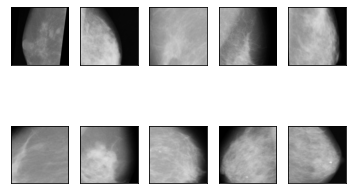

In [10]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 15,
#     https://stackoverflow.com/questions/62484597/understanding-width-shift-range-and-height-shift-range-arguments-in-kerass
#     width_shift_range = 0.05,
#     height_shift_range = 0.05,
    horizontal_flip=True,
# https://stackoverflow.com/questions/57301330/what-exactly-the-shear-do-in-imagedatagenerator-of-keras
    shear_range = 2,
#     preprocessing_function=gray_to_rgb,
    zoom_range = [0.3, 0.5],
    validation_split = 0.2 #20% para pruebas
)
# data/dataset_raw/MINI-DDSM/binary_classification/
#Generadores para sets de entrenamiento y pruebas
data_gen_train = datagen.flow_from_directory('data/dataset_raw/MIAS/binary_classification/',
                                            batch_size=32, shuffle=True,target_size=(224,224),
                                            class_mode = 'categorical',
                                            subset='training')
# color_mode='grayscale'
data_gen_test = datagen.flow_from_directory('data/dataset_raw/MIAS/binary_classification/',
                                           batch_size=32, target_size=(224,224), shuffle=True,
                                            class_mode = 'categorical',
                                            subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_train:
    for i in range(10):
#         print(type(imagen))
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i])
#         break
    break
plt.show()


In [11]:
from src.models.MobilNet2 import create_mobilNet
model = create_mobilNet()

9420800/9406464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [7]:
# import tensorflow as tf
# import tensorflow_hub as hub

# url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

# #Congelar el modelo descargado
# mobilenetv2.trainable = False

# modelo = tf.keras.Sequential([
#     mobilenetv2,
#     tf.keras.layers.Dense(2, activation='softmax')
# ])

# modelo.summary()

In [13]:
model.compile(
    optimizer = 'adam',
     loss='binary_crossentropy', # , categorical_crossentropy
    metrics = ['accuracy']
)

In [15]:
#Entrenar el modelo
EPOCAS = 10

historial = model.fit(
        data_gen_train, epochs=EPOCAS, batch_size=32,
        validation_data = data_gen_test
    )

Epoch 1/10
3/3 [==============================] - 37s 2s/step - loss: 0.7697 - accuracy: 0.5000 - val_loss: 0.7437 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 434ms/step - loss: 0.7521 - accuracy: 0.5000 - val_loss: 0.7481 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 448ms/step - loss: 0.7292 - accuracy: 0.5000 - val_loss: 0.7158 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 1s 436ms/step - loss: 0.7216 - accuracy: 0.5000 - val_loss: 0.7153 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 1s 444ms/step - loss: 0.7195 - accuracy: 0.5000 - val_loss: 0.7124 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 1s 428ms/step - loss: 0.7124 - accuracy: 0.5000 - val_loss: 0.7193 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 1s 431ms/step - loss: 0.7132 - accuracy: 0.5000 - val_loss: 0.7129 - val_accuracy: 0.5000
Epoch 8/10
3/3 [======

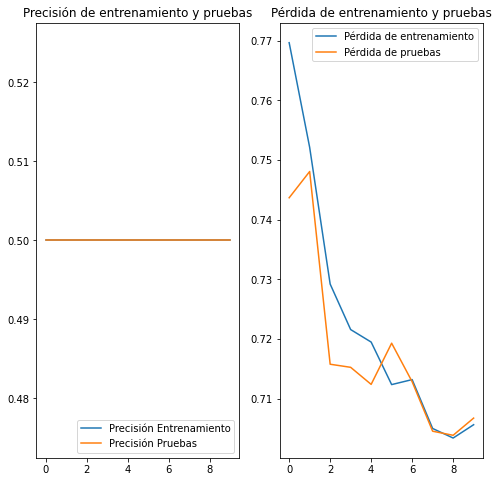

In [16]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()